In [1]:
import os, sys
os.getcwd()

"C:\\Users\\Sid's Lappy\\Documents\\Python Programming\\Portfolio projects\\Bankruptcy prediction classification"

In [2]:
# Importing general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')
import datetime

In [3]:
# importing machine learning libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, accuracy_score
from imblearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score
import scipy.stats as stats
from sklearn.feature_selection import RFE
from scipy.stats import norm

classifiers = [    [CatBoostClassifier(verbose=0), 'CatBoost Classifier'], 
    [XGBClassifier(), 'XGB Classifier'], 
    [RandomForestClassifier(), 'Random Forest'], 
    [KNeighborsClassifier(), 'K-Nearest Neighbours'], 
    [SGDClassifier(), 'SGDClassifier'], 
    [SVC(), 'SVC'], 
    [LGBMClassifier(), 'LGBM'], 
    [GaussianNB(), 'GaussianNB'], 
    [DecisionTreeClassifier(), 'DecisionTreeClassifier'], 
    [LogisticRegression(), 'LogisticRegression']
]

In [4]:
# Importing Dataset
df = pd.read_csv('_BANKRUPTCY PREDICTION .csv')

In [5]:
df1 = df.copy()

In [6]:
df1.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


In [7]:
df1.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', '

## Exploratory Data Analysis

In [8]:
# Checking for null values
df1.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Bankrupt                                                    0
Length: 95, dtype: int64

In [9]:
df1.info

<bound method DataFrame.info of        ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                           

In [10]:
# Checking the distribution of target variable
print(df1['Bankrupt'].value_counts(normalize=True))

0    0.967737
1    0.032263
Name: Bankrupt, dtype: float64


In [11]:
# checking for stats summary of the data
df.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578,0.032263
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014,0.176710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477,0.000000
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798,0.000000
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#  Save a backup of the original DataFrame
df_backup = df.copy()

# Remove the "Bankrupt" column
df = df.drop("Bankrupt", axis=1)

# Add the removed column to the beginning of the DataFrame
new_col_name = "Bankrupt"
df.insert(0, new_col_name, df_backup.pop(new_col_name))

In [13]:
df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [14]:
duplicates = df1[df1.duplicated()]

In [15]:
duplicates.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt


In [16]:
df1.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


<AxesSubplot:xlabel='Bankrupt', ylabel='count'>

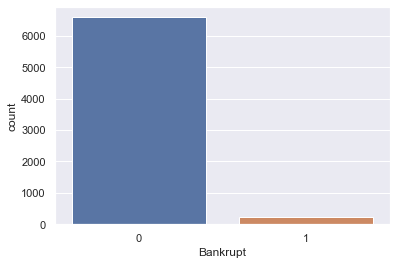

In [17]:
# Checking the class distribution of the data
sns.countplot(x='Bankrupt', data=df)

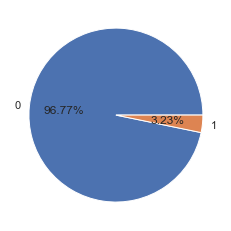

In [18]:
data = df1['Bankrupt'].value_counts()
plt.pie(data, autopct= '%1.2f%%', labels = data.index)
plt.show()

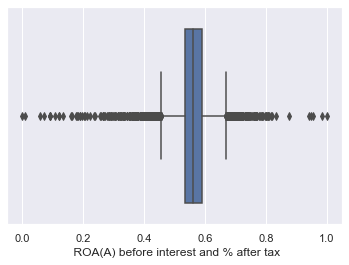

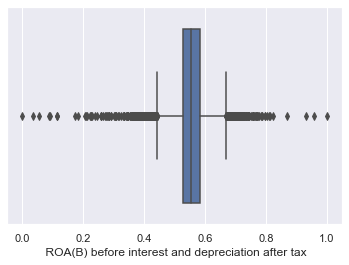

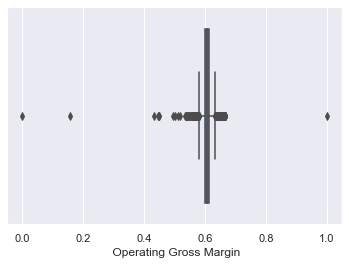

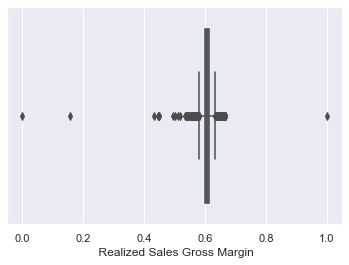

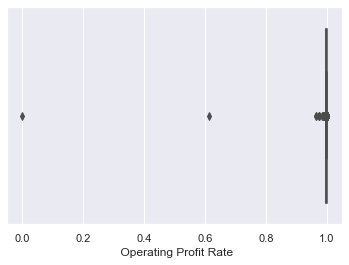

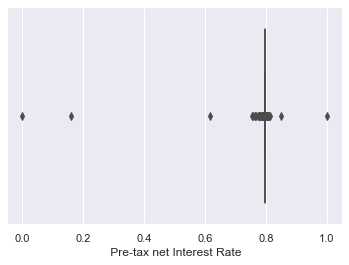

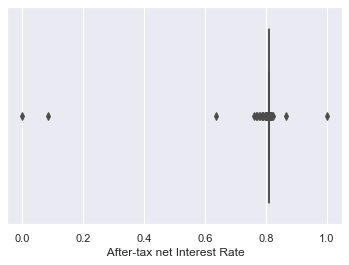

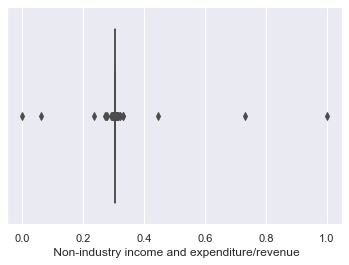

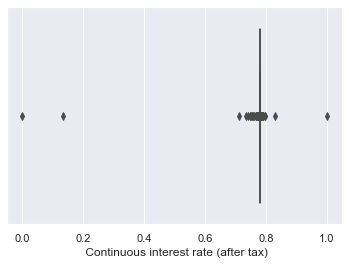

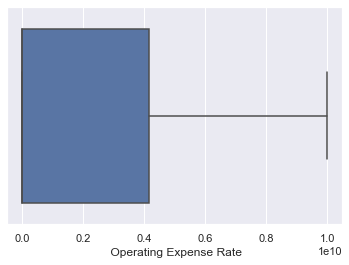

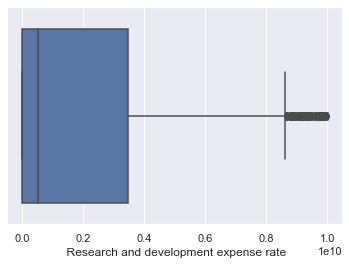

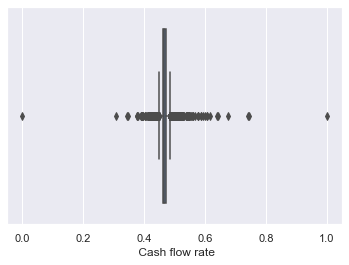

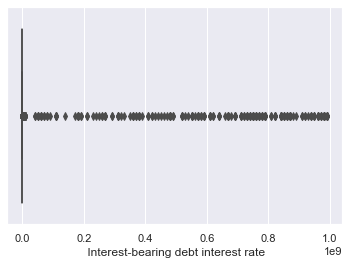

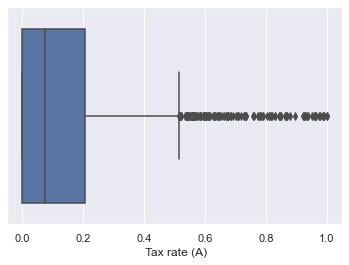

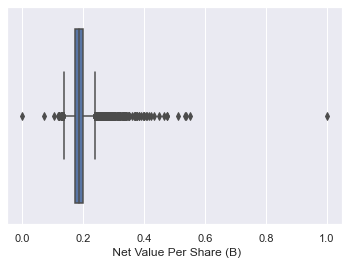

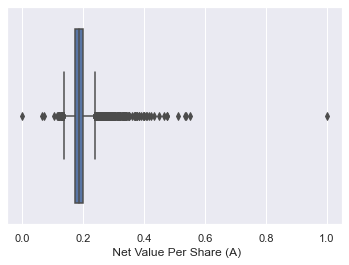

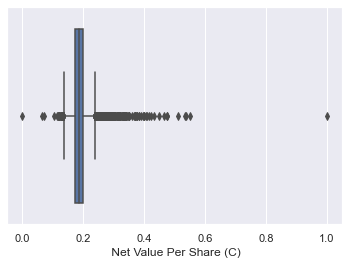

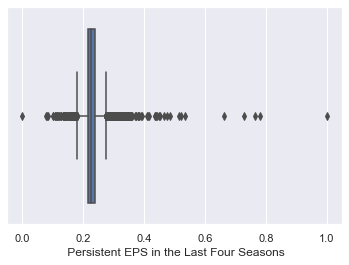

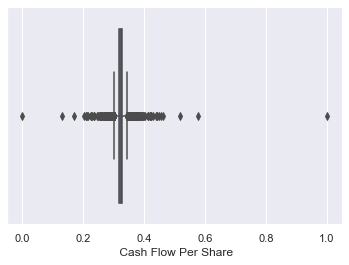

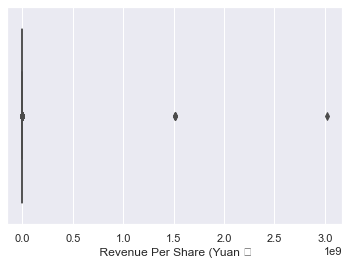

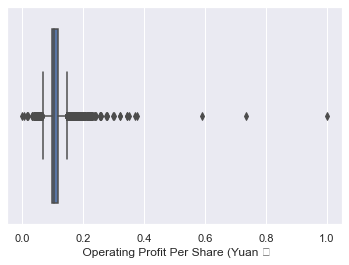

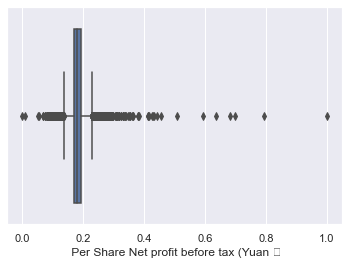

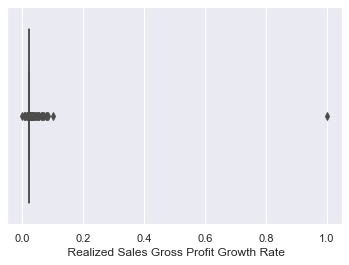

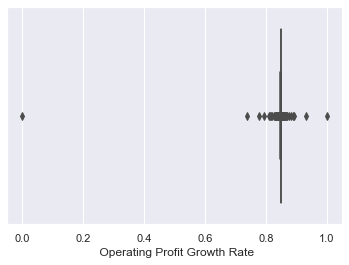

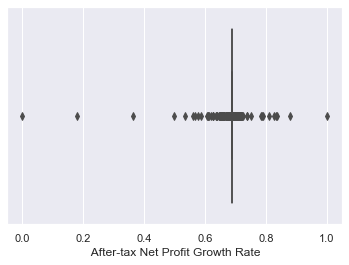

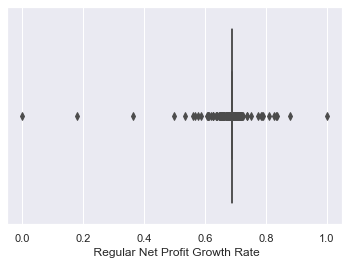

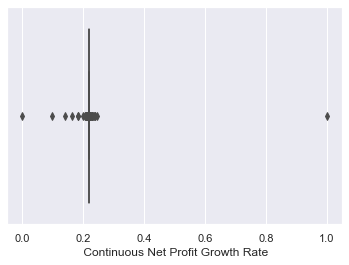

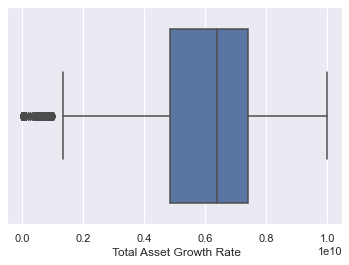

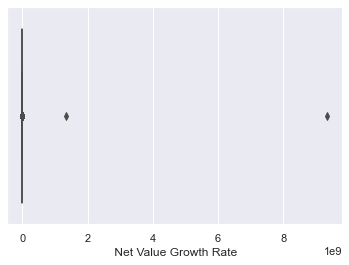

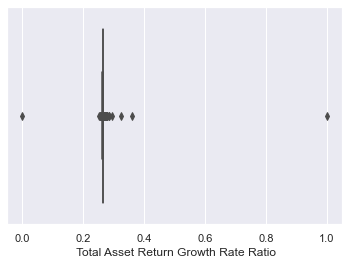

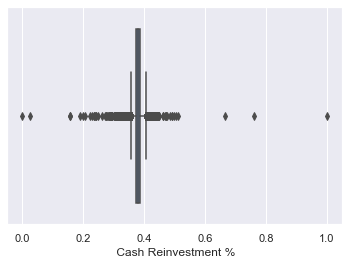

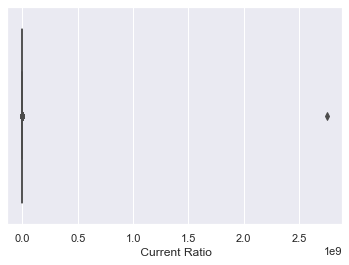

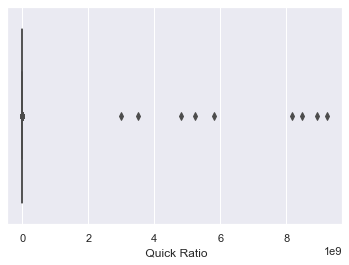

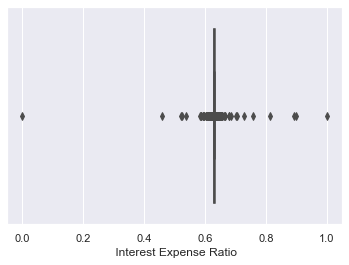

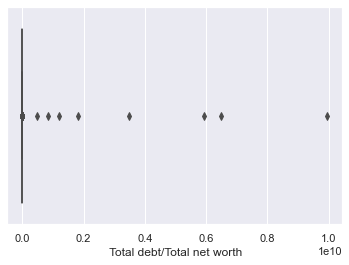

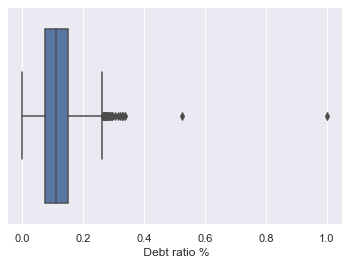

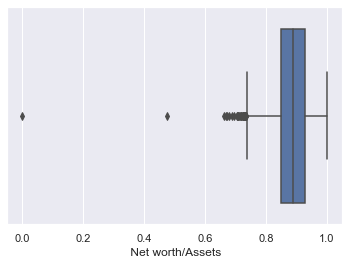

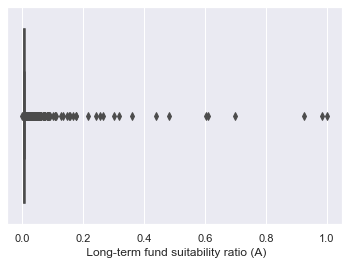

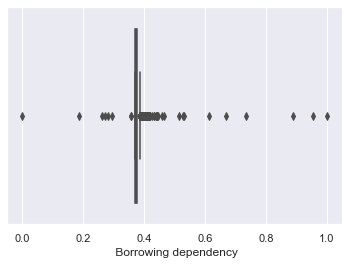

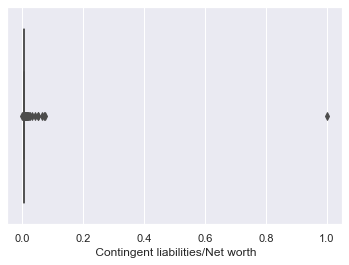

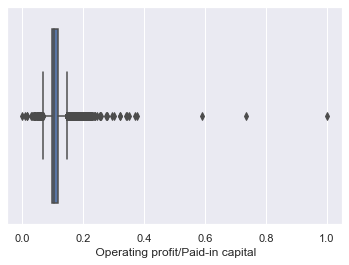

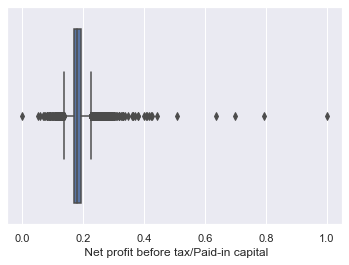

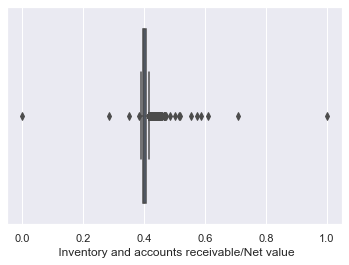

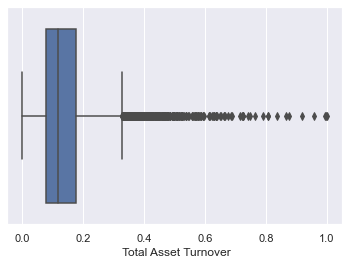

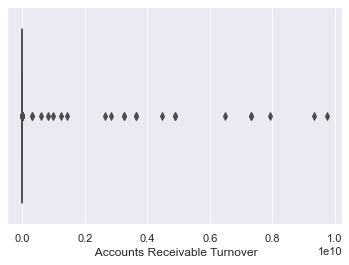

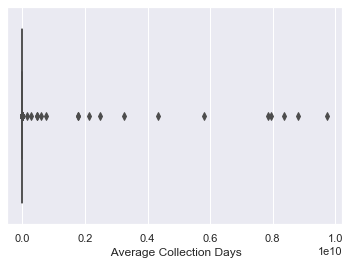

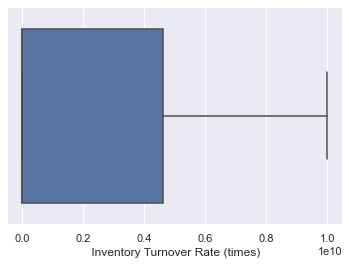

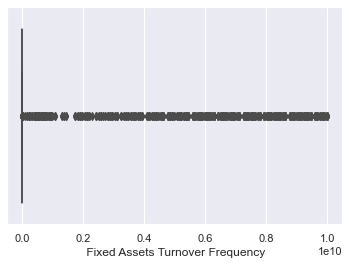

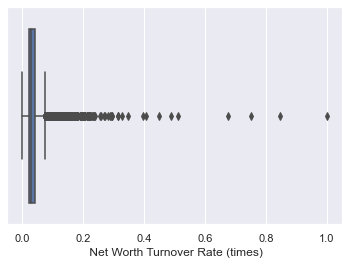

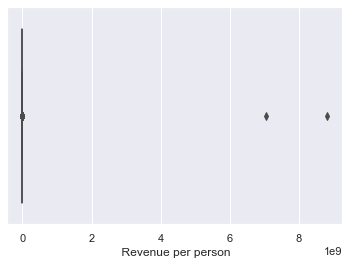

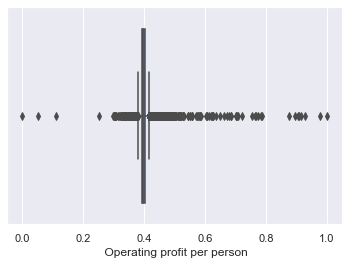

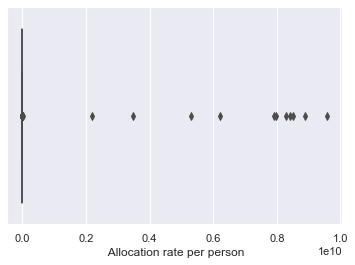

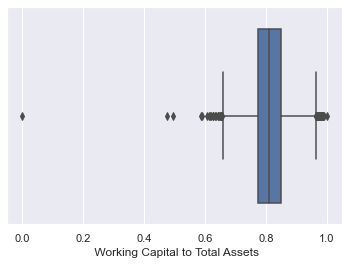

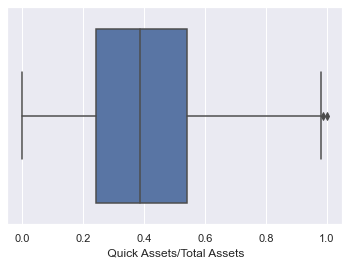

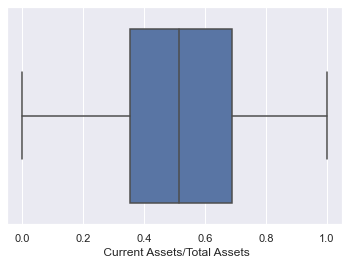

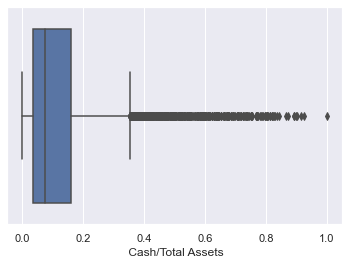

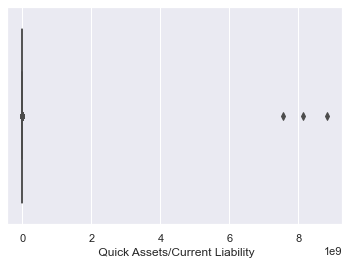

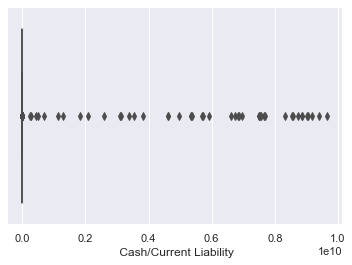

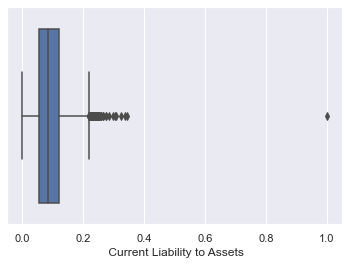

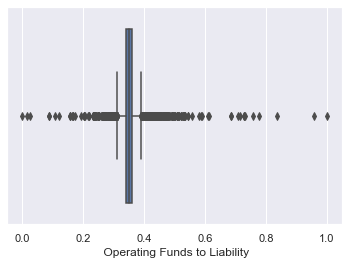

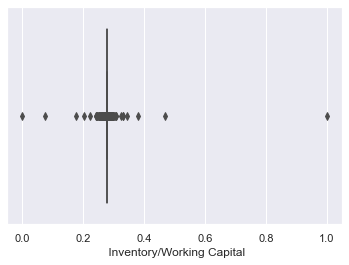

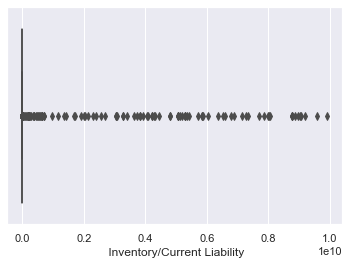

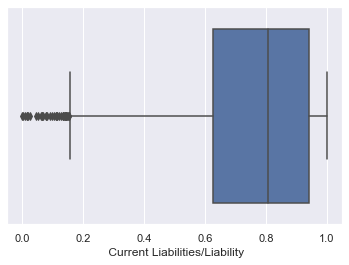

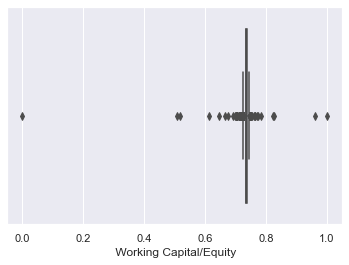

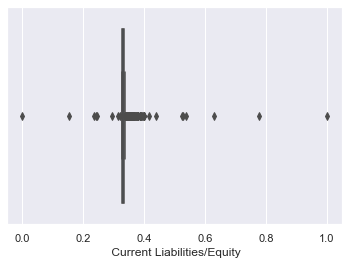

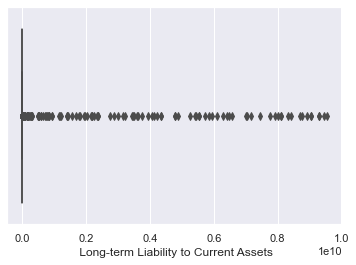

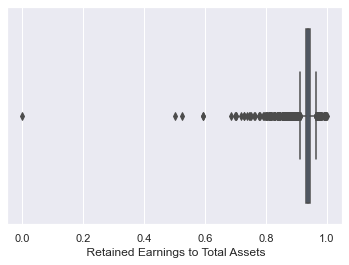

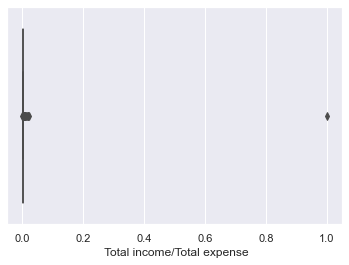

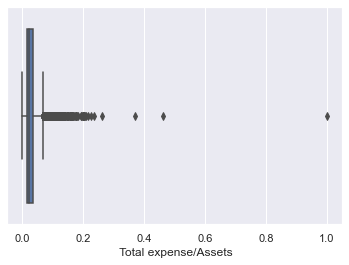

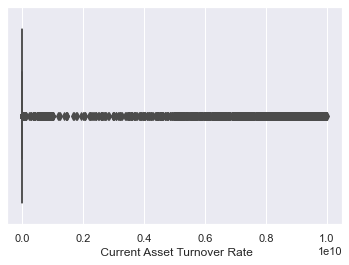

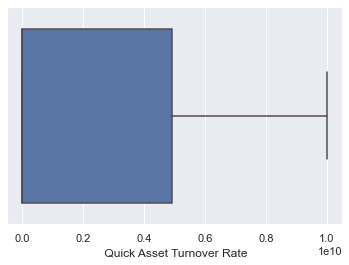

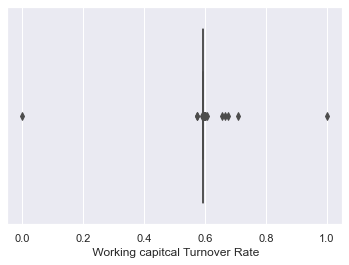

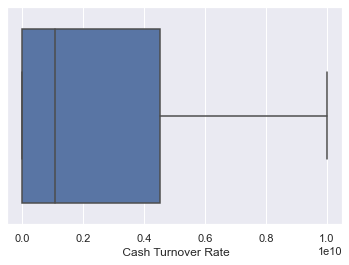

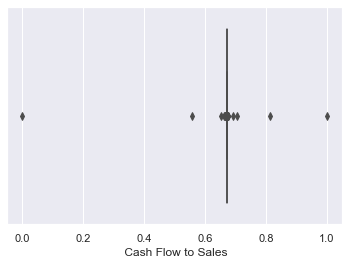

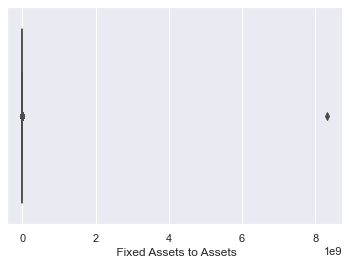

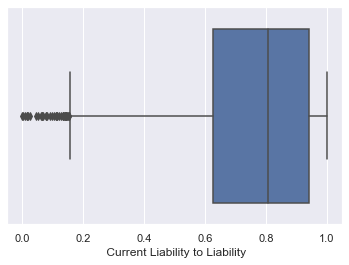

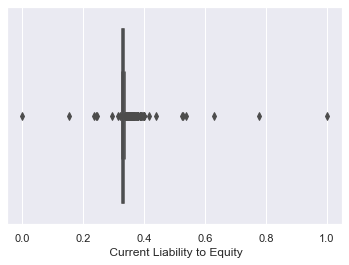

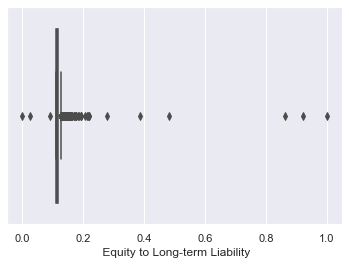

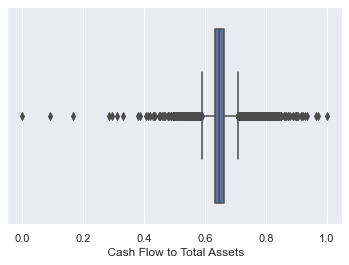

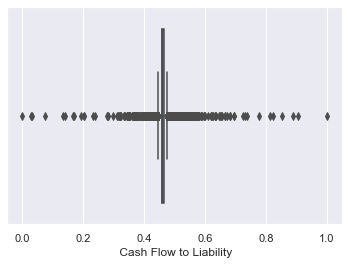

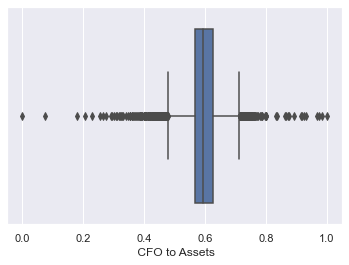

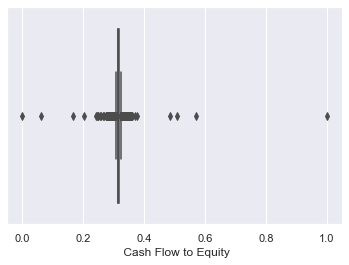

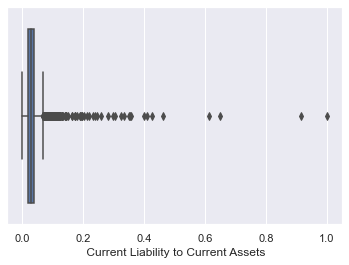

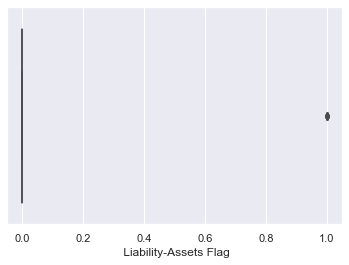

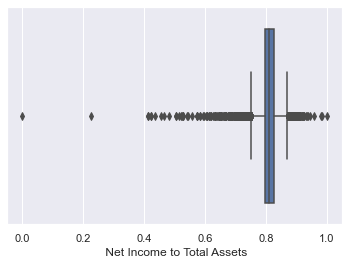

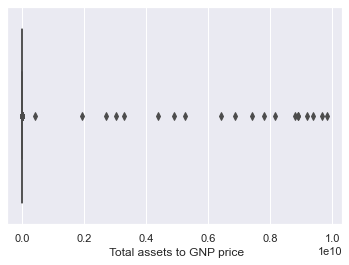

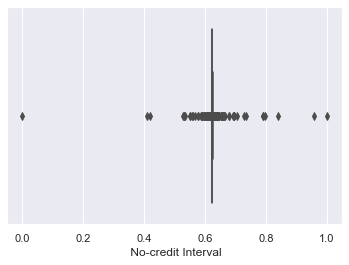

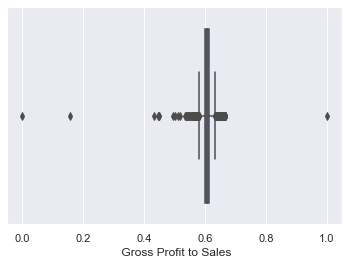

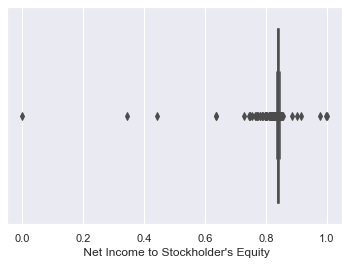

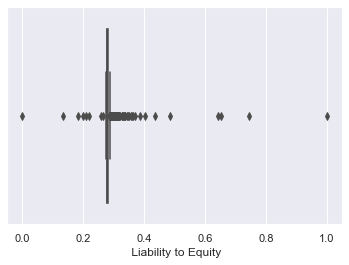

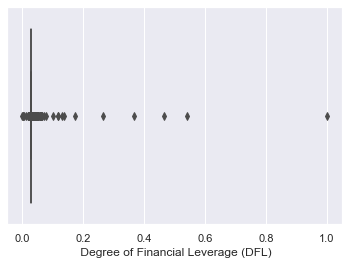

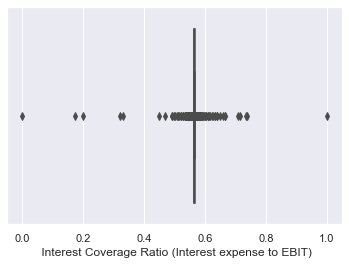

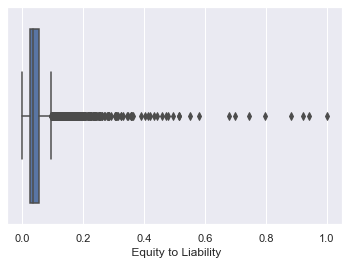

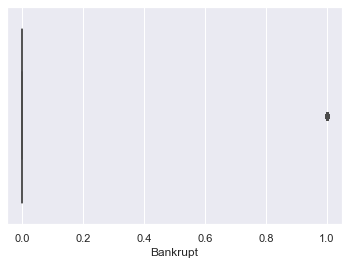

In [19]:
def boxplots(col):
    sns.boxplot(df1[col])
    plt.show()
    
for i in list(df1.select_dtypes(exclude=['object']).columns[1:]):
    boxplots(i)

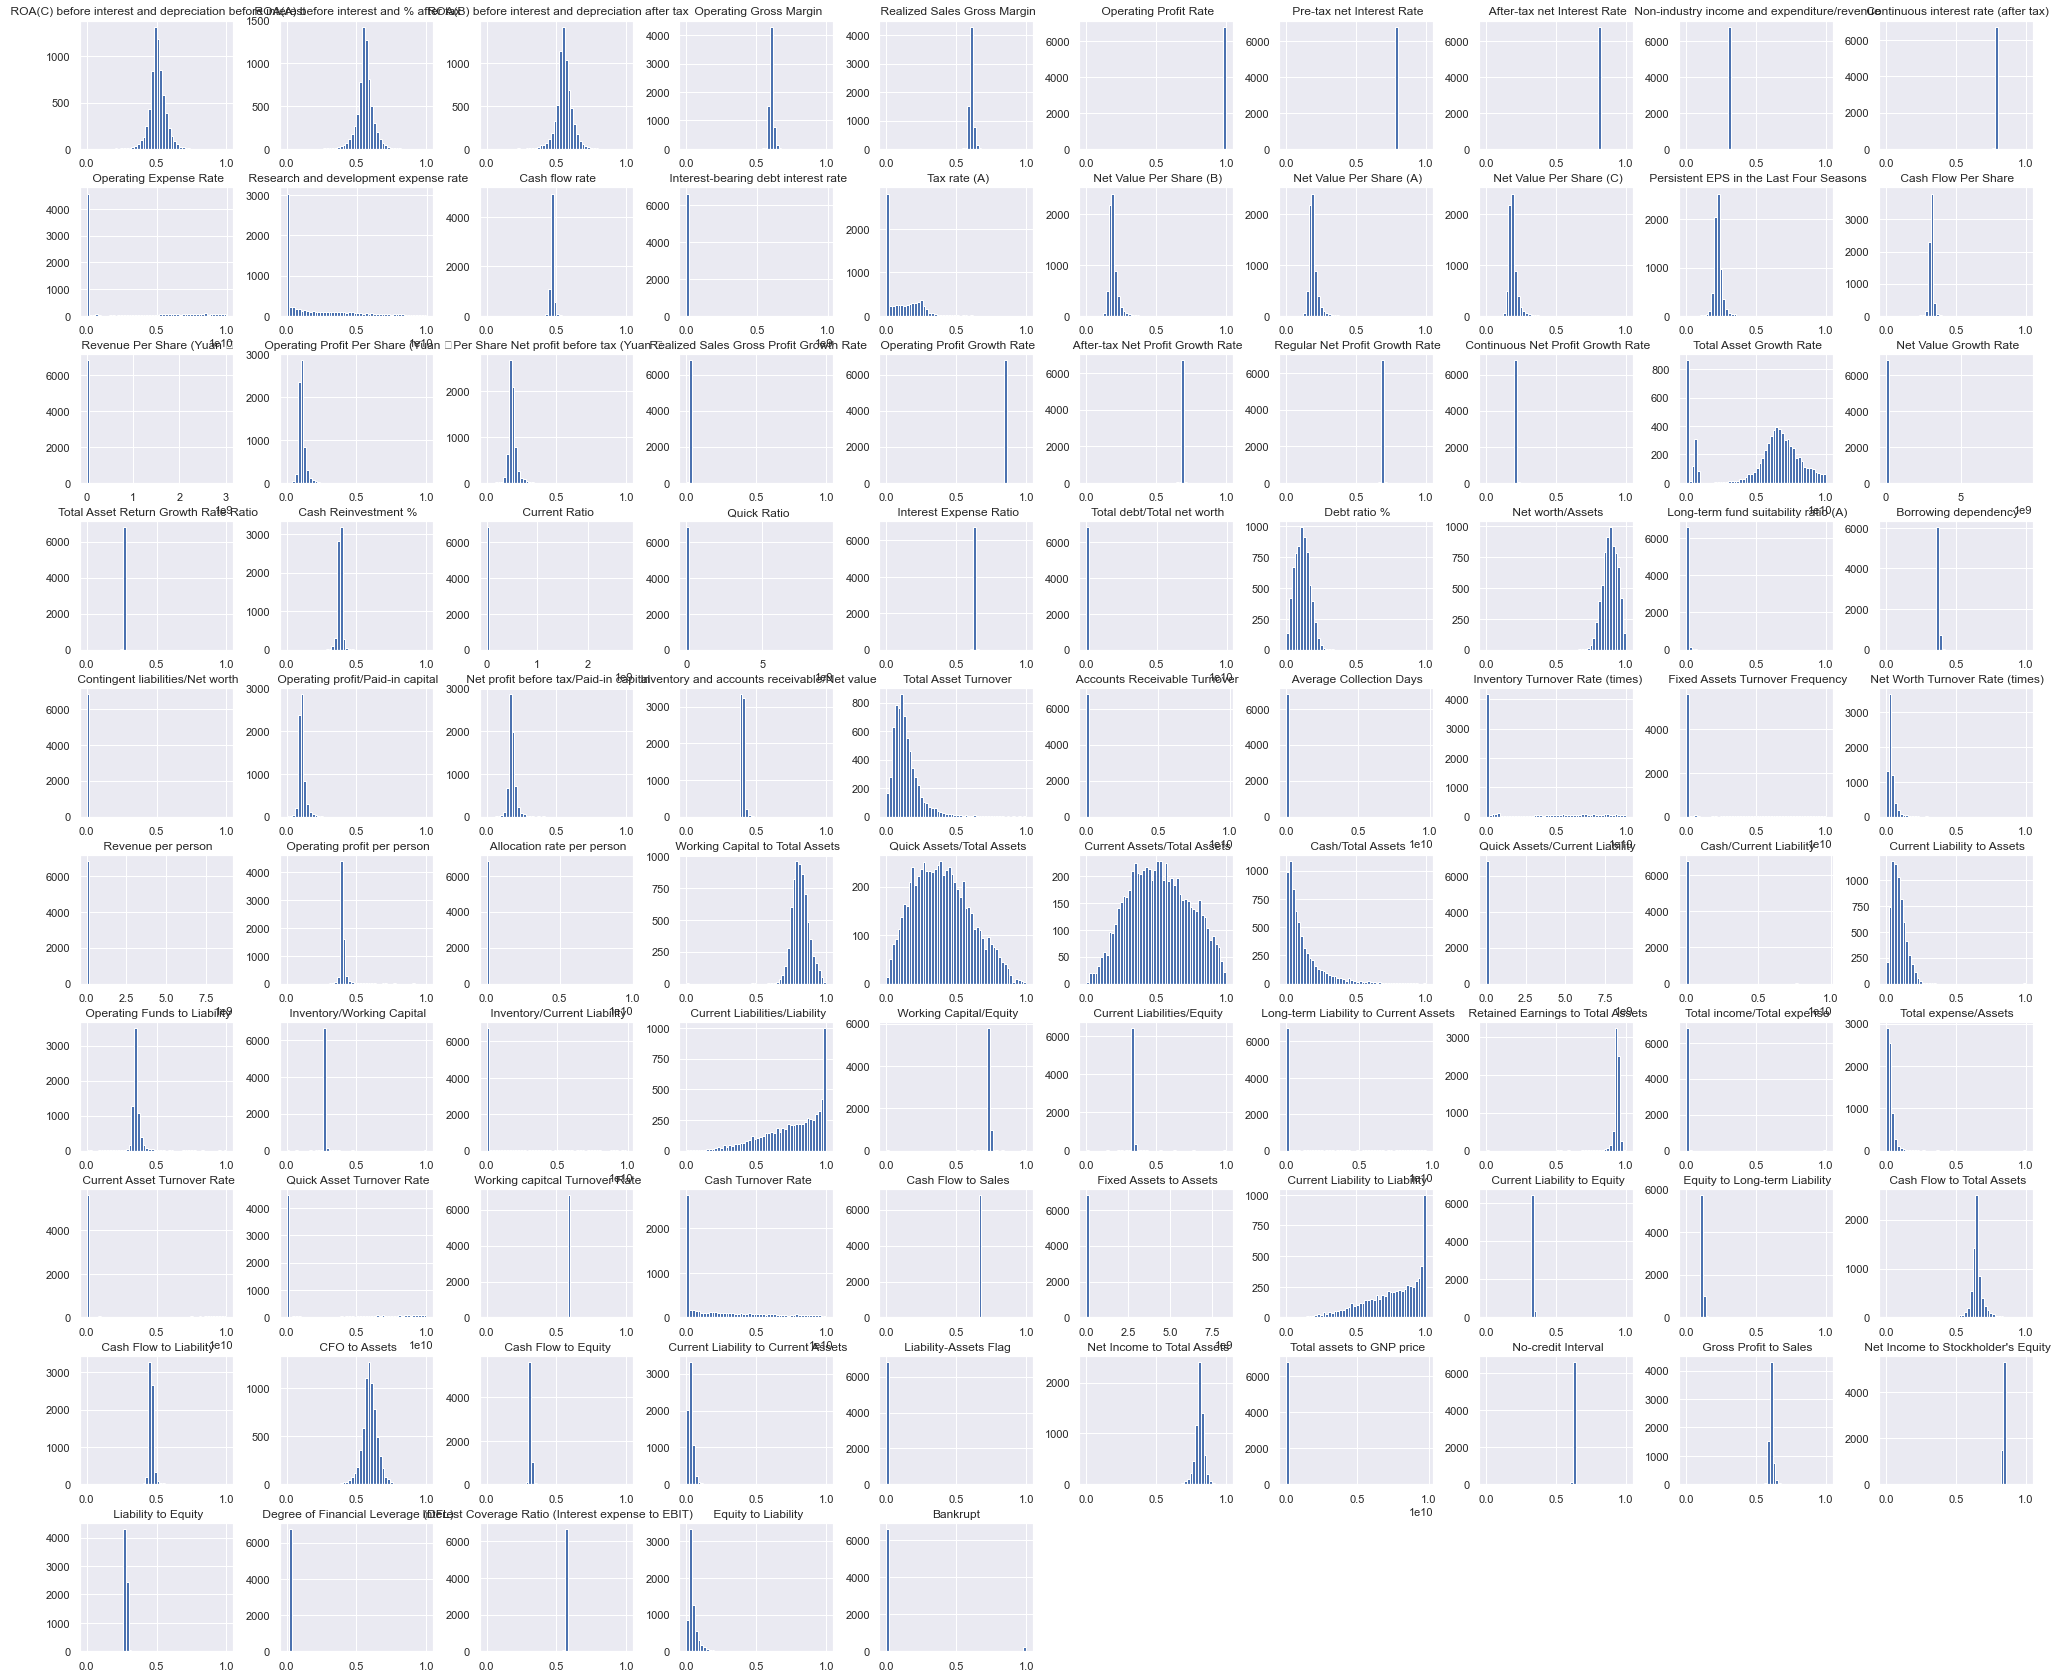

In [20]:
df1.hist(figsize = (35,30), bins = 50)
plt.show()

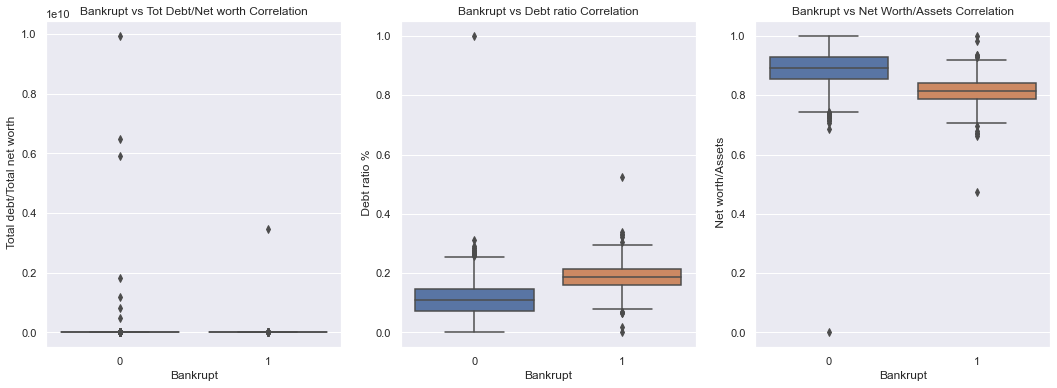

In [21]:
# plotting the interesting features
fig, axes = plt.subplots(ncols=3, figsize=(18,6))

sns.boxplot(x='Bankrupt', y=" Total debt/Total net worth", data=df1, ax=axes[0]) 
axes[0].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt', y=" Debt ratio %", data=df1, ax=axes[1])
axes[1].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt', y=" Net worth/Assets", data=df1, ax=axes[2])  
axes[2].set_title('Bankrupt vs Net Worth/Assets Correlation') 

plt.show()

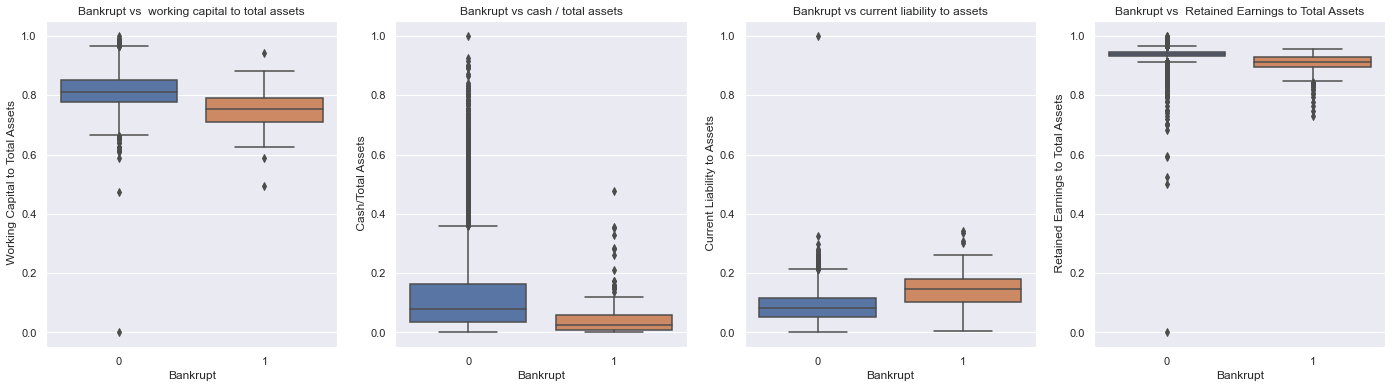

In [22]:
fig, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt', y=" Working Capital to Total Assets", data=df1, ax=axes[0])
axes[0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt', y=" Cash/Total Assets", data=df1, ax=axes[1])
axes[1].set_title('Bankrupt vs cash / total assets')

sns.boxplot(x='Bankrupt', y=" Current Liability to Assets", data=df1, ax=axes[2])
axes[2].set_title('Bankrupt vs current liability to assets')

sns.boxplot(x='Bankrupt', y=" Retained Earnings to Total Assets", data=df1, ax=axes[3])
axes[3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

Text(0.5, 1.0, 'retain earnings to total assets \n (Unstable companies)')

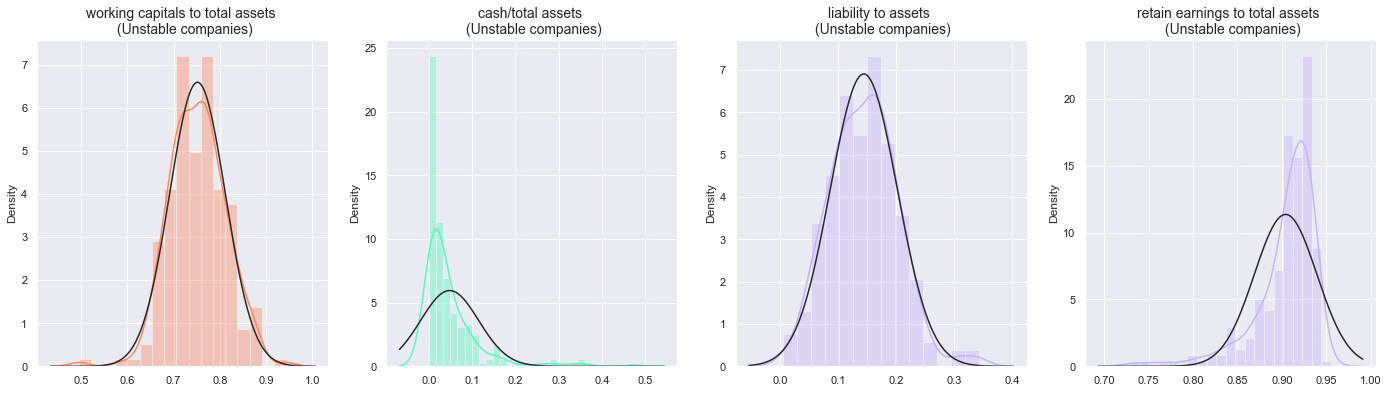

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))
working_cap = df1[' Working Capital to Total Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = df1[' Cash/Total Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = df1[' Current Liability to Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = df1[' Retained Earnings to Total Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

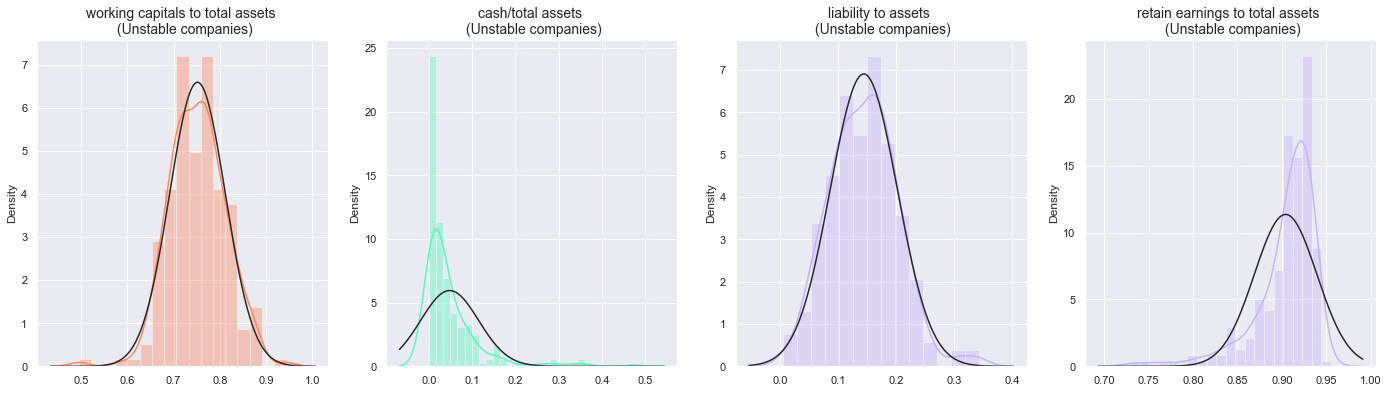

In [24]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = df1[' Working Capital to Total Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = df1[' Cash/Total Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = df1[' Current Liability to Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = df1[' Retained Earnings to Total Assets'].loc[df1['Bankrupt'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

plt.show()

## Data Preprocessing

In [25]:
def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in df:
    new_df = outliers_removal(df[col],str(col),df)

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt Lower: 0.0
Bankrupt Upper: 0.0
Bankrupt outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.47652708 | Quartile 75: 0.535562814
iqr: 0.05903573400000006
Cut Off: 0.08855360100000009
 ROA(C) before interest and depreciation before interest Lower: 0.3879734789999999
 ROA(C) before interest and depreciation before interest Upper: 0.6241164150000001
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.535542957 | Quartile 75: 0.5891572174999999
iqr: 0.053614260499999955
Cut Off: 0.08042139074999993
 ROA(A) before interest and % after tax Lower: 0.45512156625000005
 ROA(A) before interest and % after tax Upper: 0.6695786082499999
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
--------------

Quartile 25: 0.000440969 | Quartile 75: 0.000499362
iqr: 5.839300000000006e-05
Cut Off: 8.75895000000001e-05
 Net Value Growth Rate Lower: 0.00035337949999999986
 Net Value Growth Rate Upper: 0.0005869515000000001
 Net Value Growth Rate outliers for close to bankruptcy cases: 792
-----------------------------------------------------------------
Quartile 25: 0.263758926 | Quartile 75: 0.264388341
iqr: 0.000629415000000022
Cut Off: 0.0009441225000000331
 Total Asset Return Growth Rate Ratio Lower: 0.26281480349999997
 Total Asset Return Growth Rate Ratio Upper: 0.26533246350000006
 Total Asset Return Growth Rate Ratio outliers for close to bankruptcy cases: 674
-----------------------------------------------------------------
Quartile 25: 0.374748519 | Quartile 75: 0.38673112
iqr: 0.011982600999999982
Cut Off: 0.017973901499999972
 Cash Reinvestment % Lower: 0.35677461750000006
 Cash Reinvestment % Upper: 0.4047050215
 Cash Reinvestment % outliers for close to bankruptcy cases: 617
-----

-----------------------------------------------------------------
Quartile 25: 0.341022977 | Quartile 75: 0.360914887
iqr: 0.019891910000000013
Cut Off: 0.02983786500000002
 Operating Funds to Liability Lower: 0.311185112
 Operating Funds to Liability Upper: 0.39075275200000004
 Operating Funds to Liability outliers for close to bankruptcy cases: 657
-----------------------------------------------------------------
Quartile 25: 0.27703396950000003 | Quartile 75: 0.2774287055
iqr: 0.0003947359999999511
Cut Off: 0.0005921039999999267
 Inventory/Working Capital Lower: 0.2764418655000001
 Inventory/Working Capital Upper: 0.2780208094999999
 Inventory/Working Capital outliers for close to bankruptcy cases: 944
-----------------------------------------------------------------
Quartile 25: 0.0031631475 | Quartile 75: 0.011146766499999999
iqr: 0.007983618999999999
Cut Off: 0.0119754285
 Inventory/Current Liability Lower: -0.008812281
 Inventory/Current Liability Upper: 0.023122194999999998
 In

 Degree of Financial Leverage (DFL) outliers for close to bankruptcy cases: 1503
-----------------------------------------------------------------
Quartile 25: 0.565158396 | Quartile 75: 0.5657247095
iqr: 0.0005663135000000263
Cut Off: 0.0008494702500000395
 Interest Coverage Ratio (Interest expense to EBIT) Lower: 0.5643089257499999
 Interest Coverage Ratio (Interest expense to EBIT) Upper: 0.56657417975
 Interest Coverage Ratio (Interest expense to EBIT) outliers for close to bankruptcy cases: 1421
-----------------------------------------------------------------
Quartile 25: 0.0244766935 | Quartile 75: 0.0528378175
iqr: 0.028361124
Cut Off: 0.042541686
 Equity to Liability Lower: -0.0180649925
 Equity to Liability Upper: 0.0953795035
 Equity to Liability outliers for close to bankruptcy cases: 549
-----------------------------------------------------------------


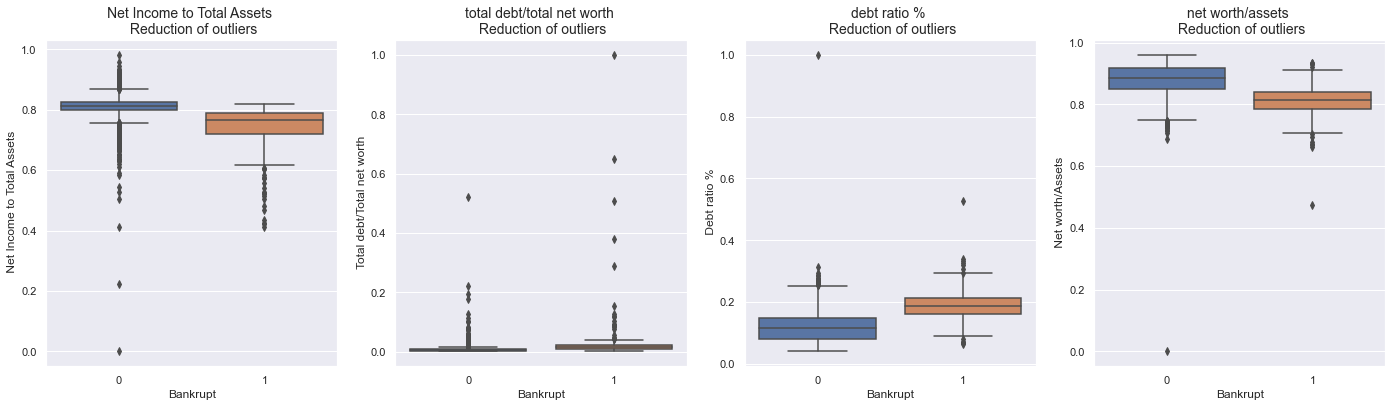

In [26]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt", y=" Net Income to Total Assets", data=new_df,ax=ax1) 
ax1.set_title("Net Income to Total Assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=" Total debt/Total net worth", data=new_df,ax=ax2) 
ax2.set_title("total debt/total net worth \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=" Debt ratio %", data=new_df,ax=ax3) 
ax3.set_title("debt ratio % \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=' Net worth/Assets', data=new_df,ax=ax4) 
ax4.set_title("net worth/assets \n Reduction of outliers", fontsize=14)

plt.show()

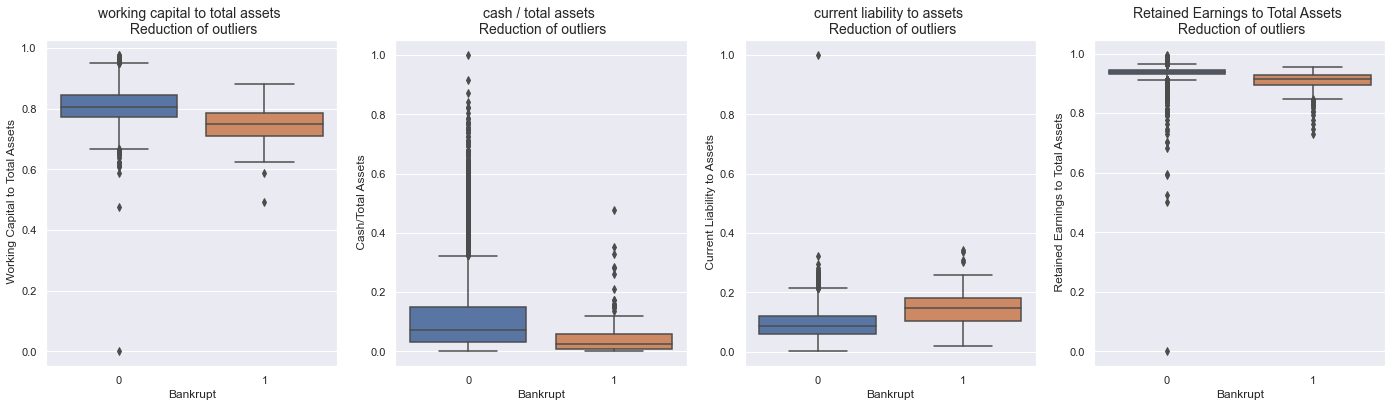

In [27]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
# Boxplots with outliers removed

sns.boxplot(x="Bankrupt", y=' Working Capital to Total Assets', data=new_df,ax=ax1) 
ax1.set_title("working capital to total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=' Cash/Total Assets', data=new_df,ax=ax2) 
ax2.set_title("cash / total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=' Current Liability to Assets', data=new_df,ax=ax3) 
ax3.set_title("current liability to assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=' Retained Earnings to Total Assets', data=new_df,ax=ax4) 
ax4.set_title("Retained Earnings to Total Assets \n Reduction of outliers", fontsize=14)
        
plt.show()


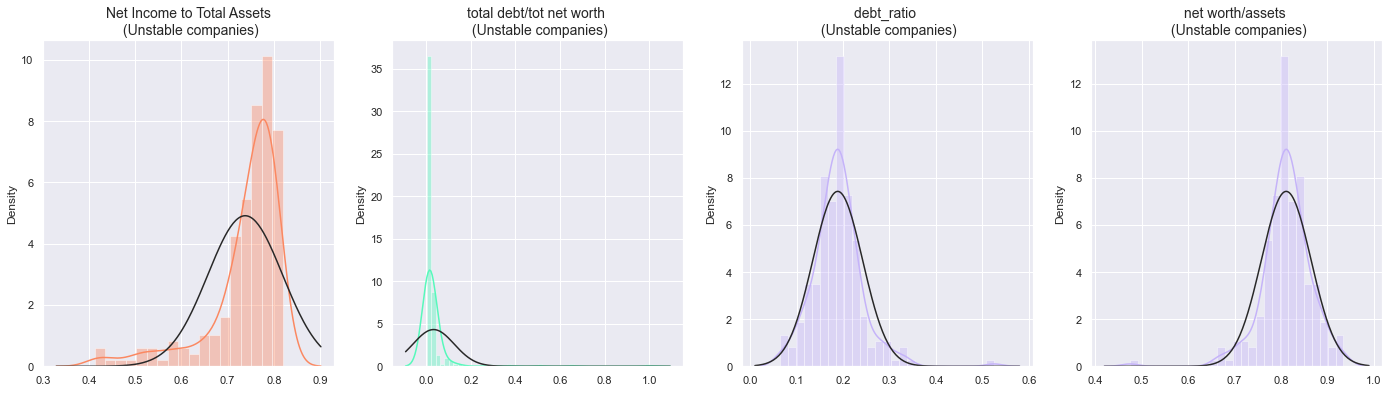

In [28]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = new_df[' Net Income to Total Assets'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = new_df[' Total debt/Total net worth'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)

debt_ratio = new_df[' Debt ratio %'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = new_df[' Net worth/Assets'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

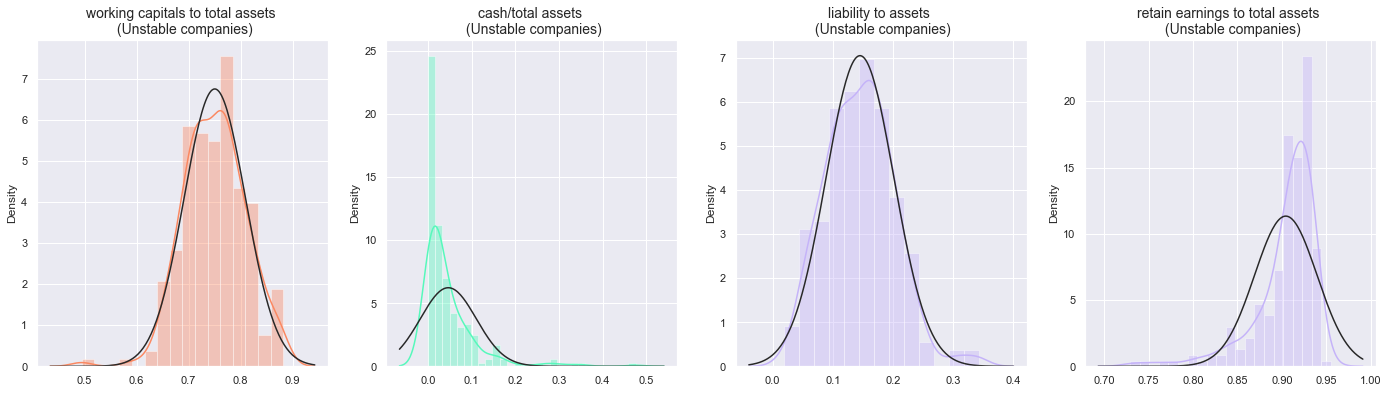

In [29]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = new_df[' Working Capital to Total Assets'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = new_df[' Cash/Total Assets'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = new_df[' Current Liability to Assets'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = new_df[' Retained Earnings to Total Assets'].loc[new_df['Bankrupt'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

plt.show()

## Feature Selection using Recursive Feature Elimination

In [31]:
# Separating the dependent and independent variables
X = df.drop('Bankrupt', axis=1)
y = df['Bankrupt']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dealing with class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [32]:
# Initialize the classifier
rfc = RandomForestClassifier(random_state=101)

# Initialize the RFE object
rfe = RFE(estimator=rfc, n_features_to_select=10, step=1)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Print the ranking of the features
print('Ranking of features:')
print(rfe.ranking_)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print('Selected features:')
print(selected_features)

Ranking of features:
[ 1 29 22 45 23 43  8  1  9  1 67 30 19 74 66 32 33 54  1 41 82 58  7 63
 53 59 44 20  4 84 38 60 83 77  1 69  3  1 51  1 13 64 10 65 18 71 80 61
 48 36 85 14 78 46 25 40 27 79 72 31 26  6 70 28 55 39 73  1  5 42 68 57
 47  1 49 81 35 24  2 52 34 56 62 17 76  1 75 50 37 21 16 12 11 15]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Creating the logistic regression object
logreg = LogisticRegression()

# Creating the RFE object and selecting the top 20 features
rfe = RFE(estimator=logreg, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

# Getting the selected features
selected_features = X_train.columns[rfe.support_]
print(selected_features)

In [ ]:
for cls in classifiers:
    model = cls[0]
    model.fit(X_smote, y_smote)
    
    y_pred = model.predict(X_test)
    print(cls[1])
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:",accuracy_score(y_test,y_pred) * 100)
    print("Recall:", recall_score(y_test, y_pred) * 100)
    print("F1 Score:", f1_score(y_test, y_pred)* 100)
    print("Precision: ",  precision_score(y_test, y_pred)* 100)
    print("\n\n\n")

In [ ]:
# Creating the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [5, 10, 15, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Creating the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Creating the RandomizedSearchCV object
rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=rf_param_grid,
                               n_iter=100,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

# Fitting the RandomizedSearchCV object to the data
rf_random.fit(X_train, y_train)

# Printing the best parameters
print(rf_random.best_params_)
